In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("spam.csv",encoding= 'latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5145,ham,Aiyar u so poor thing... I give u my support k...,NaN,NaN,NaN
5386,ham,I'm at work. Please call,NaN,NaN,NaN
2930,ham,Hi' Test on &lt;#&gt; rd ....,NaN,NaN,NaN
4528,ham,"Hiya, probably coming home * weekend after next",NaN,NaN,NaN
4943,ham,Wrong phone! This phone! I answer this one but...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#Data cleaning,EDA(exploratory data analysis),text preprocessing,model building,evaluation,improvements,website,deploy in heroku

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last columns
df.drop(columns=[ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
5082,ham,Amazing : If you rearrange these letters it gi...
1803,ham,I'm in class. Did you get my text.
4093,ham,how are you? I miss you!
3866,ham,"Alright we're hooked up, where you guys at"
558,ham,Hi Princess! Thank you for the pics. You are v...


In [8]:
#renaming the columns
df.rename(columns={'v2':'text','v1':'target'},inplace=True)
df=df[['text','target']]
df.sample(5)

,text,target
5026,PRIVATE! Your 2003 Account Statement for shows...,spam
1466,Your account has been refilled successfully by...,ham
2956,I would but I'm still cozy. And exhausted from...,ham
4824,I am going to sleep. I am tired of travel.,ham
1245,Hello which the site to download songs its urg...,ham


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [13]:
#checking duplictes
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

# 2.EDA

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

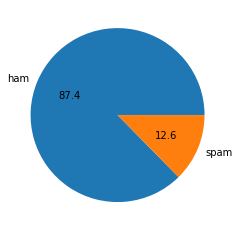

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.1f')
plt.show()

In [17]:
#Data is imbalanced

In [18]:
#Natural language tool kit
import nltk

In [19]:
#dependencies for nltk to function
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters']=df['text'].apply(len)

In [21]:
df.head()

,text,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [22]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,text,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [24]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [26]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [27]:
#ham data's analysis
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [29]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

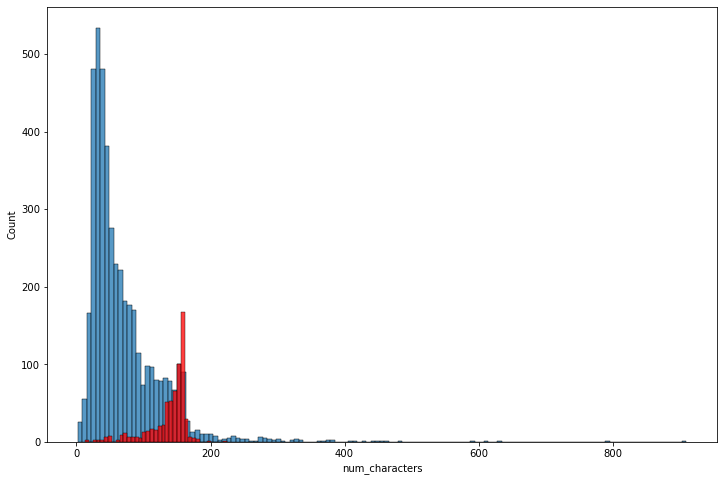

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

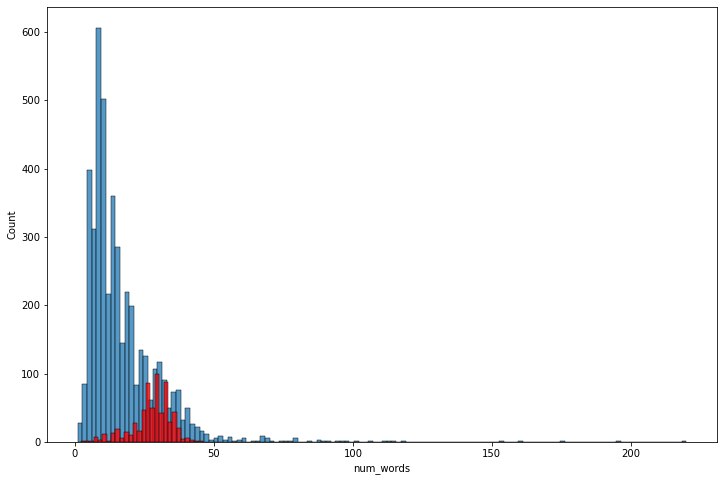

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

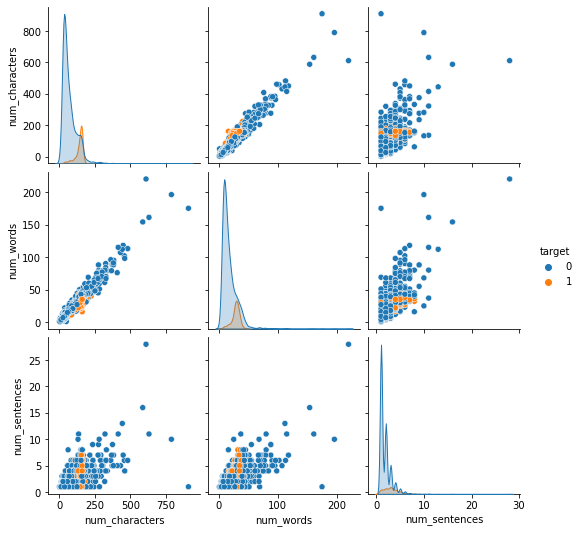

In [32]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

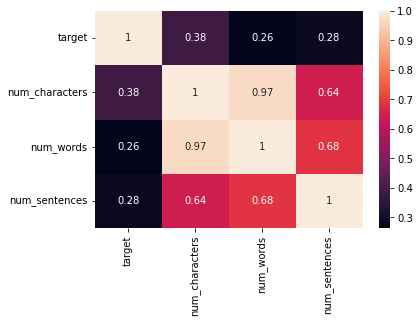

In [33]:
sns.heatmap(df.corr(),annot=True)

# 3.Data preprocessing
  .lower case
  .tokenization
  . Removing special characters
  .Removing stop words and punctuation
  . stemming

In [34]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #dancing laai danc banaidine bidhii

In [35]:
ps=PorterStemmer()

In [36]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    #text has now turned into a list
    
    
    y=[]
    for i in text:
        if i.isalnum(): # filters characters like (%%^ && **)
            y.append(i)
    x=[]
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation: #stopwords and punctuations are places where stopwords and punctuations are located
            x.append(i) 
            
            
    text=x[:]
    x.clear()
    for i in text:
        x.append(ps.stem(i))
    return " ".join(x )   #x is a list of words which is now converted into string


In [50]:
#To lookout or for revise
take="I have been learning english since 2 years. Things are going well but there are challenges!!"
ps.stem(take)

'i have been learning english since 2 years. things are going well but there are challenges!!'

In [77]:
#To lookout or for revise
a=nltk.word_tokenize(take)
x=[]
for i in a:
    if i not in string.punctuation:
        x.append(i)
text=x[:]
#x print x it is a list of words
" ".join(x) #it converts list of words into string separated by space

'I have been learning english since 2 years Things are going well but there are challenges'

In [78]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [80]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [81]:
df['target'][0]

0

In [82]:
df['transformed_text']=df['text'].apply(transform_text)

In [56]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [83]:
# now we create word cloud which basically emphasize most used words in hams and spams
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [98]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

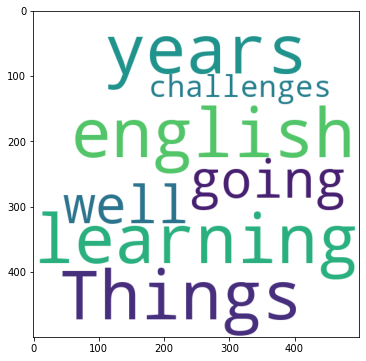

In [95]:
#  df[df['target'] == 1] ['transformed_text'].str.cat(sep=" ")
#Purpose just for testing
# test=wc.generate(take)
# plt.figure(figsize=(15,6))
# plt.imshow(test)


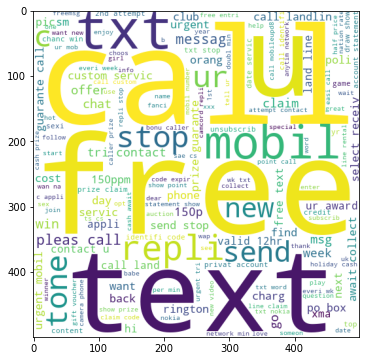

In [99]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [100]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

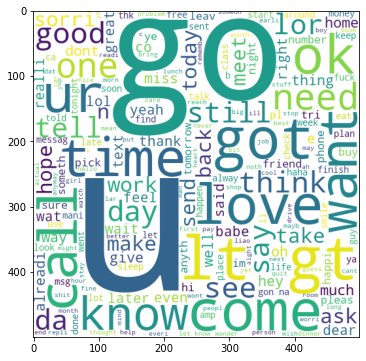

In [101]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [102]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [169]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        

In [170]:
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'.split()

['freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv']

In [171]:
len(spam_corpus)

9939

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


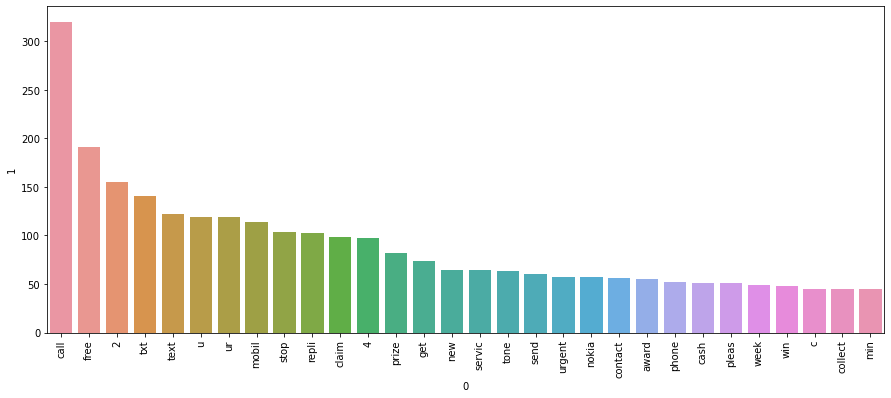

In [172]:
plt.figure(figsize=(15,6))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [173]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [174]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [175]:
len(ham_corpus)

35394

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


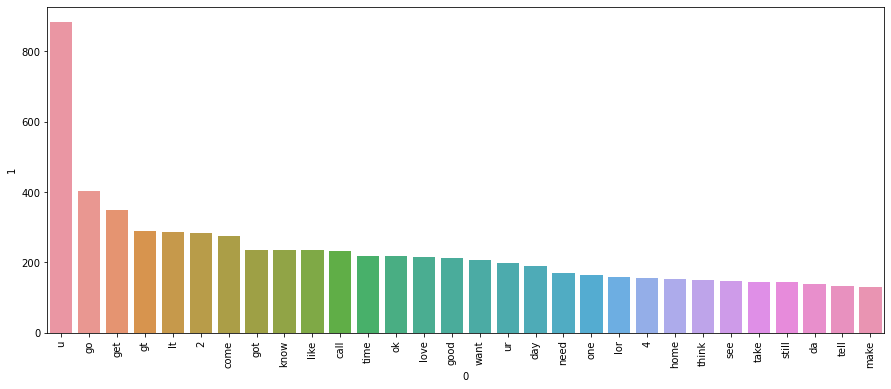

In [176]:
plt.figure(figsize=(15,6))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building 

In [177]:
#Working On Naive Based algorithm as it works better ont textual data
#we will try on others algorithms too


#text vectorization
#bag of words

In [178]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [179]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [180]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [181]:
X.shape

(5169, 6708)

In [182]:
y=df['target'].values

In [183]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [198]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB #since data ko distribution tha xaina so using all probability
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [185]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [186]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [187]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [199]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [189]:
#choosing mnb with tnidf

In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [191]:
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier(max_depth=7)
lr=LogisticRegression(solver='liblinear',penalty='l1')
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
vc=VotingClassifier(estimators=[('knn',knn),('svm',svc),('lr',lr)])
rfc=RandomForestClassifier(n_estimators=50,random_state=2)

In [192]:
clfs={'knn':knn,'svc':svc,'dtc':dtc,'lr':lr,'abc':abc,'bc':bc,'gbc':gbc,'etc':etc,'vc':vc,'rfc':rfc}

In [194]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy_scored=accuracy_score(y_test,y_pred)
    predicted_scored=precision_score(y_test,y_pred)
    return accuracy_scored,predicted_scored
    
    

In [200]:
train_classifier(lr,X_train,X_test,y_train,y_test)

(0.9516441005802708, 0.94)

In [203]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_scored=[]
precision_scored=[]
for name,clf in clfs.items():
    accuracy,precision=train_classifier(clf,X_train,X_test,y_train,y_test)
    print("for",name)
    print("Accuracy - ",accuracy)
    print("Precision - ",precision)
    
    accuracy_scored.append(accuracy)
    precision_scored.append(precision)
    
    
    
    
    

for knn
Accuracy -  0.9003868471953579
Precision -  1.0
for svc
Accuracy -  0.9661508704061895
Precision -  0.9813084112149533
for dtc
Accuracy -  0.9506769825918762
Precision -  0.8717948717948718
for lr
Accuracy -  0.9516441005802708
Precision -  0.94
for abc
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
for bc
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
for gbc
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
for etc
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
for vc
Accuracy -  0.9555125725338491
Precision -  0.9791666666666666
for rfc
Accuracy -  0.9738878143133463
Precision -  1.0


In [209]:
df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scored,'Precision':precision_scored}).sort_values('Precision',ascending=False)

In [214]:
df1.append({'Algorithm':'mnb','Accuracy':0.959381,'Precision':1}, ignore_index=True).sort_values('Precision',ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_7124\1762330594.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append({'Algorithm':'mnb','Accuracy':0.959381,'Precision':1}, ignore_index=True).sort_values('Precision',ascending=False)


,Algorithm,Accuracy,Precision
0,knn,0.900387,1.000000
1,rfc,0.973888,1.000000
10,mnb,0.959381,1.000000
2,etc,0.975822,0.982906
3,svc,0.966151,0.981308
4,vc,0.955513,0.979167
5,abc,0.961315,0.945455
6,lr,0.951644,0.940000
7,gbc,0.952611,0.923810
8,dtc,0.950677,0.871795


In [215]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))
